<div><h2><b><center>MANOJ KUMAR - 2048015</b></h2></div>
<div><h3><b><center>Lab 11: Clustering (Distance based methods)</b></h3></div>

    Kidney diseases are disorders that affect the functions of the kidney. During the late stages, kidney diseases can cause kidney failure to prevent chronic kidney disease-CKD by utilising machine learning techniques to diagnose kidney disease at an early stage. We describe the most prominent supervised machine learning algorithms (SML), their characteristics, Generalisation capacity of each method, Time complexity, Hyper-parameter tuning, and Advantages and disadvantages of each technique comparatively. 
    
    The Kidney Disease dataset obtained from UCI was used to determine and test its highest percentage of accuracy and benchmark.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings(action='ignore')

# Pre-processing

In [4]:
data=pd.read_csv("kidney_disease.csv")

In [5]:
data.head(10)

id   age     bp     sg   al   su       rbc        pc         pcc  \
0   0  48.0   80.0  1.020  1.0  0.0       NaN    normal  notpresent   
1   1   7.0   50.0  1.020  4.0  0.0       NaN    normal  notpresent   
2   2  62.0   80.0  1.010  2.0  3.0    normal    normal  notpresent   
3   3  48.0   70.0  1.005  4.0  0.0    normal  abnormal     present   
4   4  51.0   80.0  1.010  2.0  0.0    normal    normal  notpresent   
5   5  60.0   90.0  1.015  3.0  0.0       NaN       NaN  notpresent   
6   6  68.0   70.0  1.010  0.0  0.0       NaN    normal  notpresent   
7   7  24.0    NaN  1.015  2.0  4.0    normal  abnormal  notpresent   
8   8  52.0  100.0  1.015  3.0  0.0    normal  abnormal     present   
9   9  53.0   90.0  1.020  2.0  0.0  abnormal  abnormal     present   

           ba  ...  pcv     wc   rc  htn   dm  cad appet   pe  ane  \
0  notpresent  ...   44   7800  5.2  yes  yes   no  good   no   no   
1  notpresent  ...   38   6000  NaN   no   no   no  good   no   no   
2  notpresent  ...   31   7500  NaN   no  yes   no  poor   no  yes   
3  notpresent  ...   32   6700  3.9  yes   no   no  poor  yes  yes   
4  notpresent  ...   35   7300  4.6   no   no   no  good   no   no   
5  notpresent  ...   39   7800  4.4  yes  yes   no  good  yes   no   
6  notpresent  ...   36    NaN  NaN   no   no   no  good   no   no   
7  notpresent  ...   44   6900    5   no  yes   no  good  yes   no   
8  notpresent  ...   33   9600  4.0  yes  yes   no  good   no  yes   
9  notpresent  ...   29  12100  3.7  yes  yes   no  poor   no  yes   

  classification  
0            ckd  
1            ckd  
2            ckd  
3            ckd  
4            ckd  
5            ckd  
6            ckd  
7            ckd  
8            ckd  
9            ckd  

[10 rows x 26 columns]

In [6]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [9]:
data.describe()

id         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    199.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000  
mean   148.036517   57.425722    3.072454  137.528754    4.627244   12.526437  
std     79.281714   50.503006    5.741126   10.408752    3.193904    2.912587  
min     22.000000    1.500000    0.400000    4.500000    2.500000    3.100000  
25%     99.000000   27.000000    0.900000  135.000000    3.800000   10.300000  
50%    121.000000   42.000000    1.300000  138.000000    4.400000   12.650000  
75%    163.000000   66.000000    2.800000  142.000000    4.900000   15.000000  
max    490.000000  391.000000   76.000000  163.000000   47.000000   17.800000

### Data Cleaning

In [10]:
for i in range(data.shape[0]):
    if data.iloc[i,25]=='ckd\t':
        data.iloc[i,25]='ckd'
    if data.iloc[i,20] in [' yes','\tyes']:
        data.iloc[i,20]='yes'
    if data.iloc[i,20]=='\tno':
        data.iloc[i,20]='no'
    if data.iloc[i,21]=='\tno':
        data.iloc[i,21]='no'
    if data.iloc[i,16]=='\t?':
        data.iloc[i,16]=np.nan
    if data.iloc[i,16]=='\t43':
        data.iloc[i,16]='43'
    if data.iloc[i,17]=='\t?':
        data.iloc[i,17]=np.nan
    if data.iloc[i,17]=='\t6200':
        data.iloc[i,17]= '6200'
    if data.iloc[i,17]=='\t8400':
        data.iloc[i,17]= '6200'
    if data.iloc[i,18]=='\t?':
        data.iloc[i,18]=np.nan
    if data.iloc[i,25]=='ckd':
        data.iloc[i,25]='yes'
    if data.iloc[i,25]=='notckd':
        data.iloc[i,25]='no'

In [11]:
data.drop('id',axis=1,inplace=True)
data.head()

age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr  ...  pcv    wc   rc  htn   dm cad appet   pe  ane classification  
0  121.0  ...   44  7800  5.2  yes  yes  no  good   no   no            yes  
1    NaN  ...   38  6000  NaN   no   no  no  good   no   no            yes  
2  423.0  ...   31  7500  NaN   no  yes  no  poor   no  yes            yes  
3  117.0  ...   32  6700  3.9  yes   no  no  poor  yes  yes            yes  
4  106.0  ...   35  7300  4.6   no   no  no  good   no   no            yes  

[5 rows x 25 columns]

In [12]:
feature_names=['Age (yrs)','Blood Pressure (mm/Hg)','Specific Gravity','Albumin','Sugar','Red Blood Cells',
               'Pus Cells','Pus Cell Clumps','Bacteria','Blood Glucose Random (mgs/dL)','Blood Urea (mgs/dL)',
               'Serum Creatinine (mgs/dL)','Sodium (mEq/L)','Potassium (mEq/L)','Hemoglobin (gms)','Packed Cell Volume',
               'White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)','Hypertension','Diabetes Mellitus',
               'Coronary Artery Disease','Appetite','Pedal Edema','Anemia','Chronic Kidney Disease']
data.columns=feature_names

In [14]:
mistyped=['Packed Cell Volume','White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)']
numeric=[]
for i in data.columns:
    if data[i].dtype=='float64':
        numeric.append(i)
numeric=numeric+mistyped

In [15]:
for col in mistyped:
        data[col]=data[col].astype('float')

In [16]:
print(data['Packed Cell Volume'].unique())
print(data['White Blood Cells (cells/cmm)'].unique())
print(data['Red Blood Cells (millions/cmm)'].unique())

[44. 38. 31. 32. 35. 39. 36. 33. 29. 28. nan 16. 24. 37. 30. 34. 40. 45.
 27. 48. 52. 14. 22. 18. 42. 17. 46. 23. 19. 25. 41. 26. 15. 21. 43. 20.
 47.  9. 49. 50. 53. 51. 54.]
[ 7800.  6000.  7500.  6700.  7300.    nan  6900.  9600. 12100.  4500.
 12200. 11000.  3800. 11400.  5300.  9200.  6200.  8300.  8400. 10300.
  9800.  9100.  7900.  6400.  8600. 18900. 21600.  4300.  8500. 11300.
  7200.  7700. 14600.  6300.  7100. 11800.  9400.  5500.  5800. 13200.
 12500.  5600.  7000. 11900. 10400. 10700. 12700.  6800.  6500. 13600.
 10200.  9000. 14900.  8200. 15200.  5000. 16300. 12400. 10500.  4200.
  4700. 10900.  8100.  9500.  2200. 12800. 11200. 19100. 12300. 16700.
  2600. 26400.  8800.  7400.  4900.  8000. 12000. 15700.  4100.  5700.
 11500.  5400. 10800.  9900.  5200.  5900.  9300.  9700.  5100.  6600.]
[5.2 nan 3.9 4.6 4.4 5.  4.  3.7 3.8 3.4 2.6 2.8 4.3 3.2 3.6 4.1 4.9 2.5
 4.2 4.5 3.1 4.7 3.5 6.  2.1 5.6 2.3 2.9 2.7 8.  3.3 3.  2.4 4.8 5.4 6.1
 6.2 6.3 5.1 5.8 5.5 5.3 6.4 5.7 5.9 6

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       391 non-null    float64
 1   Blood Pressure (mm/Hg)          388 non-null    float64
 2   Specific Gravity                353 non-null    float64
 3   Albumin                         354 non-null    float64
 4   Sugar                           351 non-null    float64
 5   Red Blood Cells                 248 non-null    object 
 6   Pus Cells                       335 non-null    object 
 7   Pus Cell Clumps                 396 non-null    object 
 8   Bacteria                        396 non-null    object 
 9   Blood Glucose Random (mgs/dL)   356 non-null    float64
 10  Blood Urea (mgs/dL)             381 non-null    float64
 11  Serum Creatinine (mgs/dL)       383 non-null    float64
 12  Sodium (mEq/L)                  313 

In [18]:
categoricals=[]
for col in data.columns:
    if not col in numeric:
        categoricals.append(col)
categoricals.remove('Chronic Kidney Disease')

In [19]:
categoricals

['Red Blood Cells',
 'Pus Cells',
 'Pus Cell Clumps',
 'Bacteria',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia']

In [20]:
import matplotlib.style as style
style.use('fivethirtyeight')

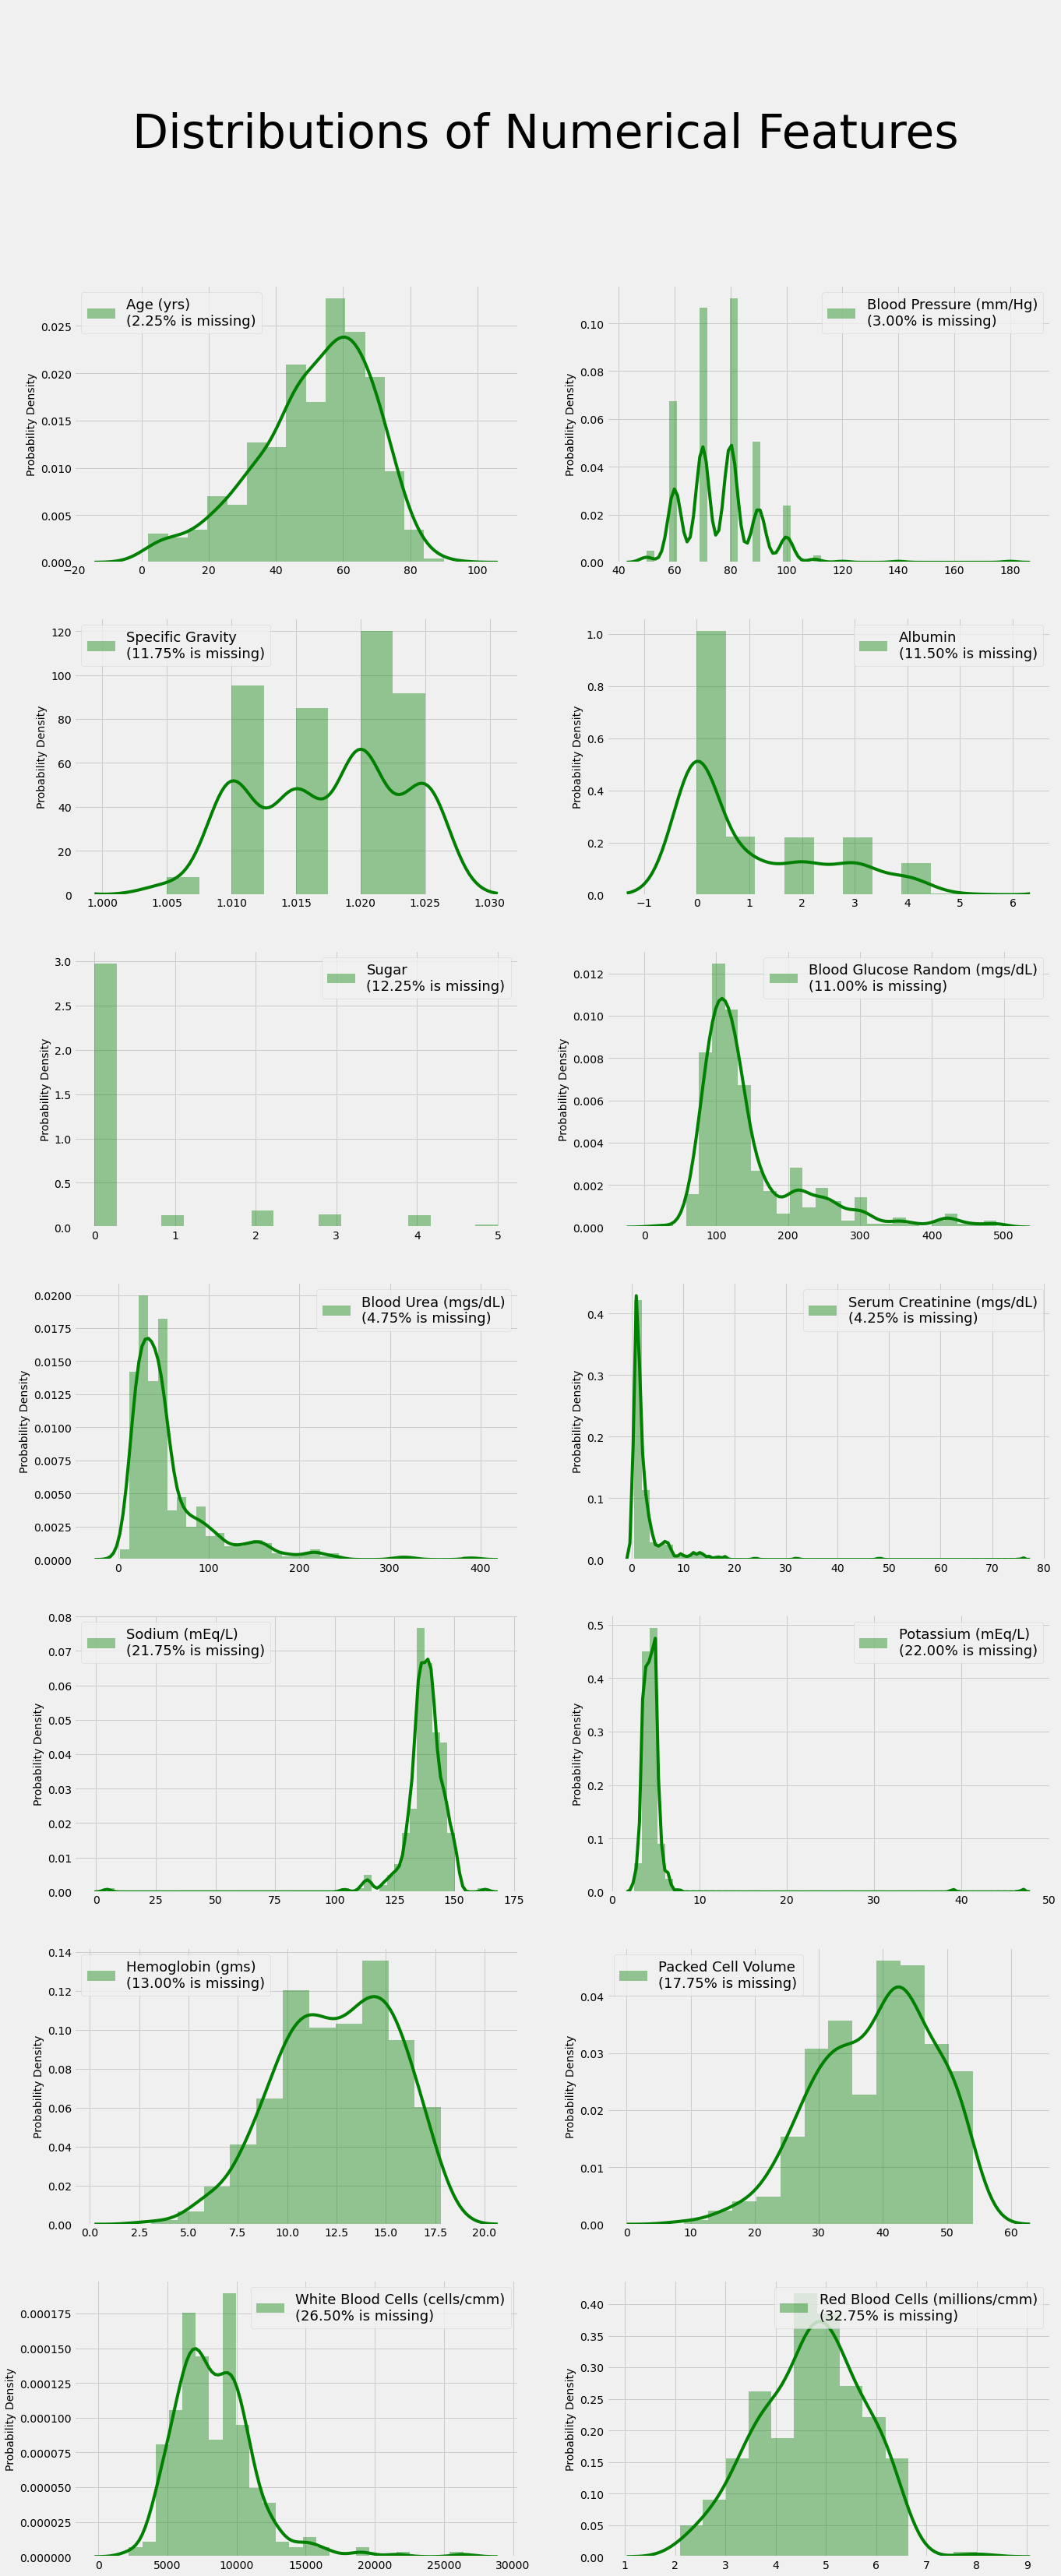

In [21]:
n_rows, n_cols = (7,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 50))
figure.suptitle('\n\nDistributions of Numerical Features', fontsize=60)

for index, column in enumerate(numeric):
    
    i,j = (index // n_cols), (index % n_cols)
    
    miss_perc="%.2f"%(100*(1-(data[column].dropna().shape[0])/data.shape[0]))
    
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    fig=sns.distplot(data[column], color="g", label=collabel, norm_hist=True,
    
    ax=axes[i,j], kde_kws={"lw":4})
    
    fig=fig.legend(loc='best', fontsize=18)
    
    axes[i,j].set_ylabel("Probability Density",fontsize='medium')
    
    axes[i,j].set_xlabel(None)

plt.show()

##### Notes:
    Some features show some very distant outliers.  
    Some others have discrete values, but I'll be treating them like continuous ones.  
    The reason being is that these are measures of biological variables which are in reality continuous.   
    Them being discrete is probably due to the method they've been measured with.  
    Some features have high proportions of missing values, thus they cannot be imputed with measures of central tendency. That would distort their distributions.  
    Plus, some features are very skewed while others are almost normal, some have a very distinct mode while some don't. Which means even if we didn't have so many missing values, we'd have to deal with each feature separately.  
    Which would not be very enjoyable.

In [22]:
style.use('seaborn-darkgrid')

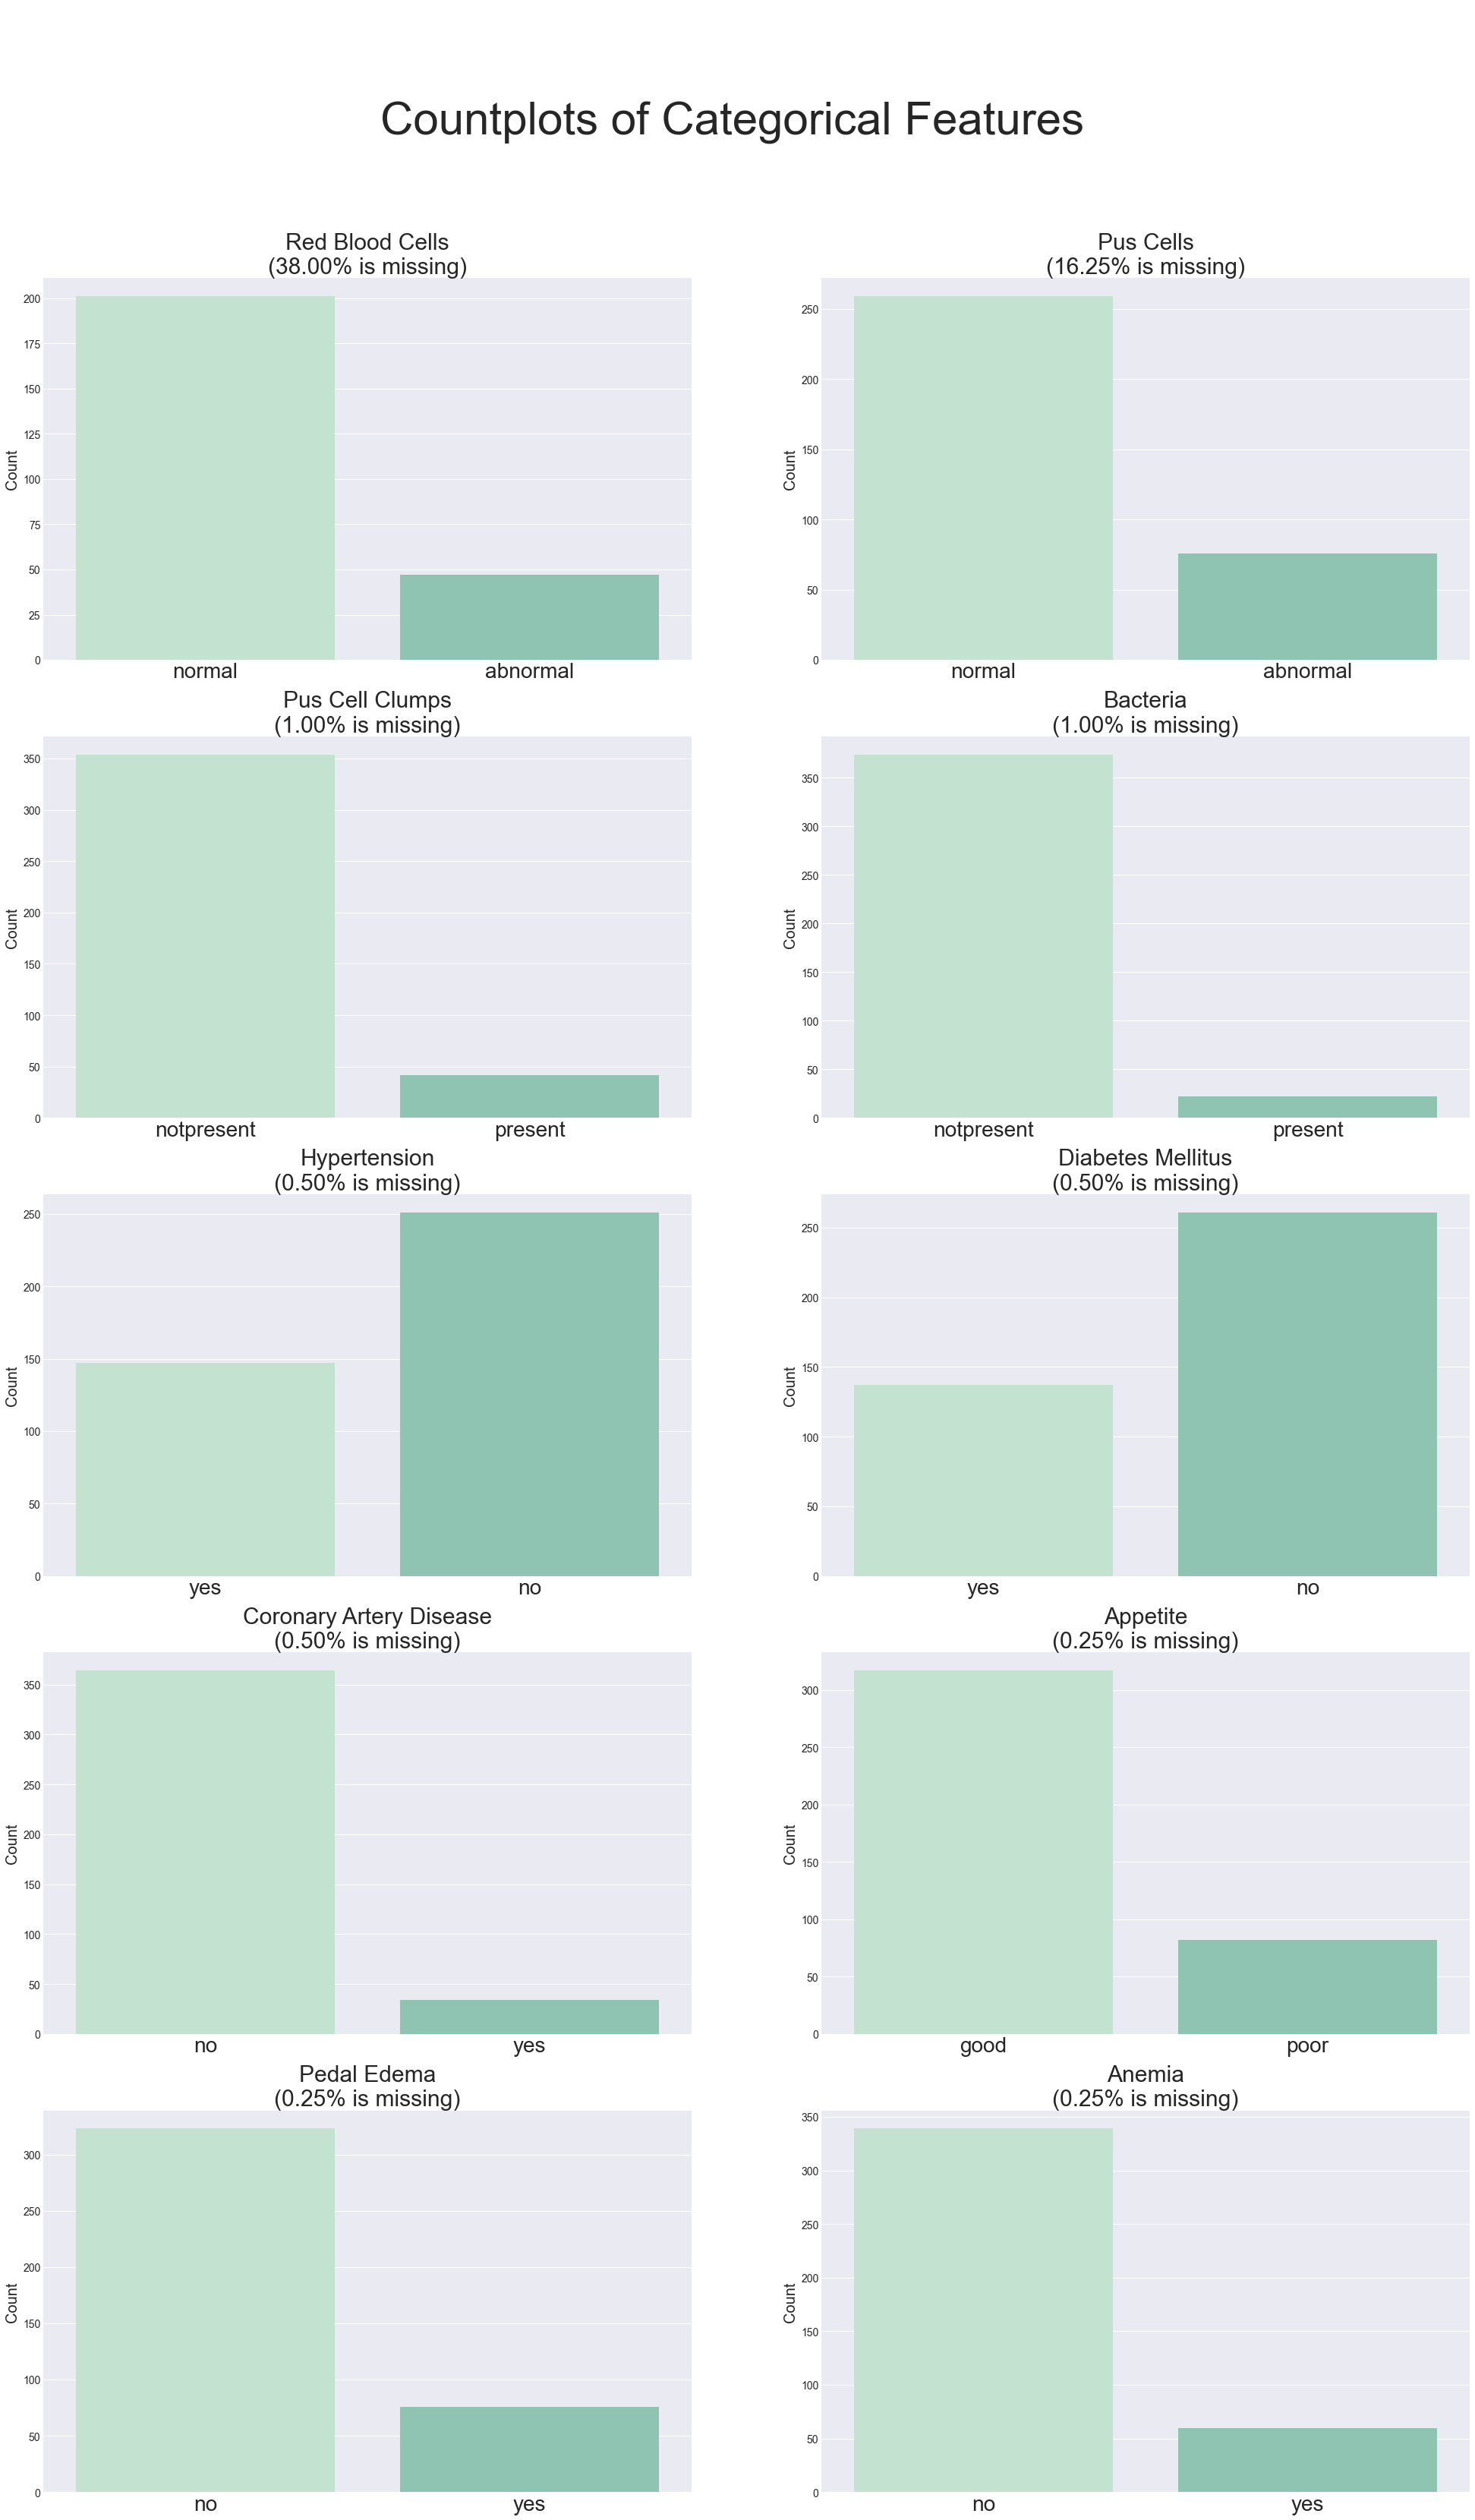

In [23]:
n_rows, n_cols = (5,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(30, 50))
figure.suptitle('\n\nCountplots of Categorical Features', fontsize=60)

for index, column in enumerate(categoricals):
    
    i,j = index // n_cols, index % n_cols
    
    miss_perc="%.2f"%(100*(1-(data[column].dropna().shape[0])/data.shape[0]))
    
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    fig = sns.countplot(x=column, data=data,label=collabel, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1),
    
    ax=axes[i,j])
    
    axes[i,j].set_title(collabel,fontsize=30)
    
    axes[i,j].set_xlabel(None)
    
    axes[i,j].set_ylabel("Count",fontsize=20)
    
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), Fontsize=28)

plt.show()

##### Notes:
    Some features have very high percentages of missing values while some have almost none.  
    Certain abnormalities/diseases seem relatively commun in this dataset, such as diabetes and hypertension.  
    I'm no health expert, but I don't think this sample of 400 people well-represents the population of India (which is where the data was collected), nor any other population.  
    This means we won't be doing any inferential statistics.  
    To be honest, this project was initially intended to be a statistics project. I just wanted to practice resampling and hypothesis testing.  
    But the plan kept changing.

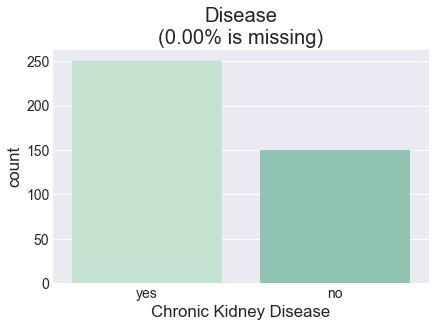

In [24]:
miss_perc="%.2f"%(100*(1-(data['Chronic Kidney Disease'].dropna().shape[0])/data.shape[0]))
    
label="Disease\n(missing:\n{}%)".format(miss_perc)
fig=sns.countplot(x=data['Chronic Kidney Disease'],label=label, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1))
plt.title("Disease\n({}% is missing)".format(miss_perc))
plt.show()

Let's take a look at missing values.

In [25]:
style.use('seaborn-darkgrid')

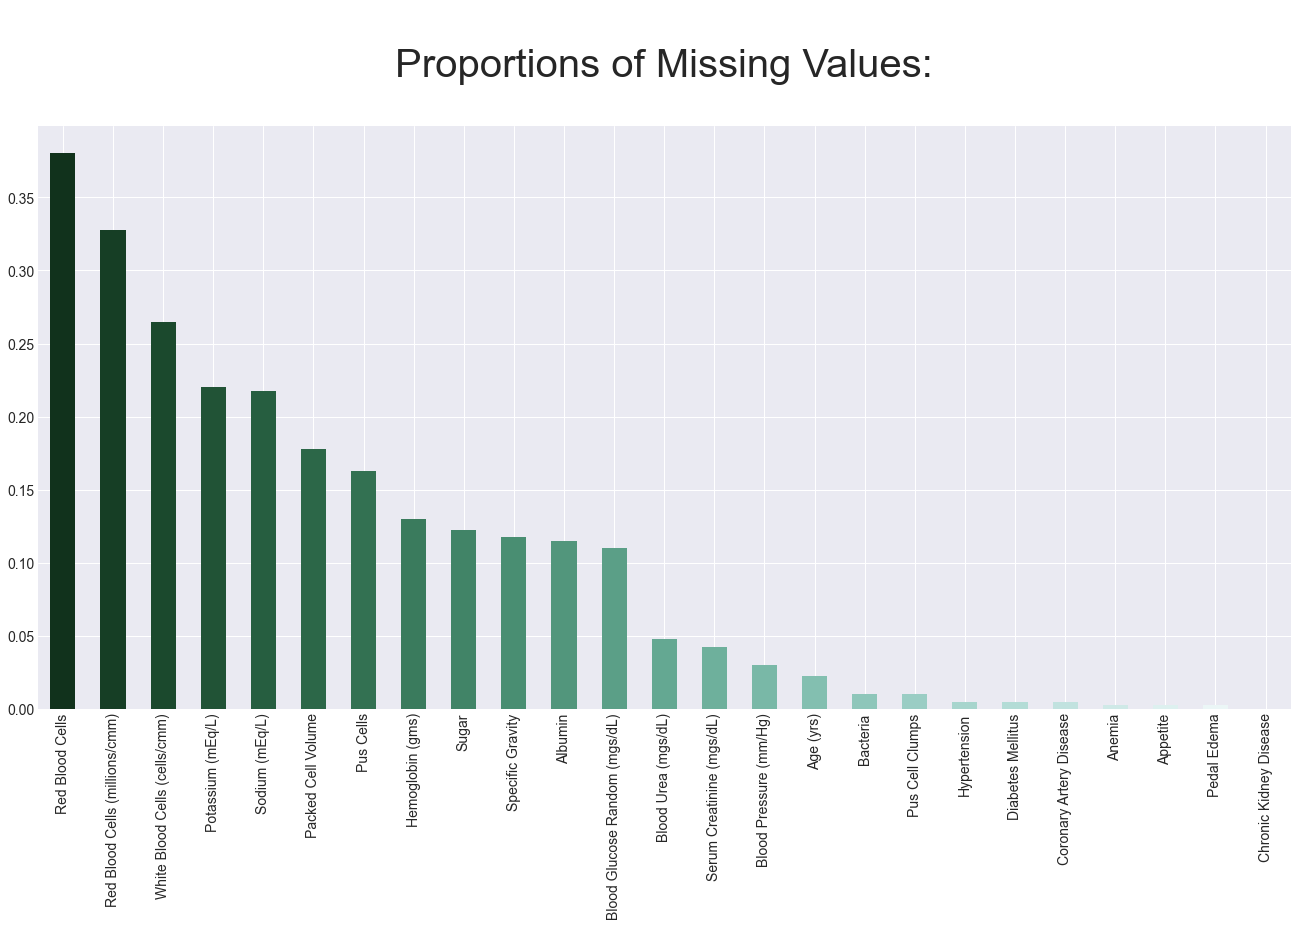

In [26]:
d=((data.isnull().sum()/data.shape[0])).sort_values(ascending=False)
d.plot(kind='bar',
       color=sns.cubehelix_palette(start=2,
                                    rot=0.15,
                                    dark=0.15,
                                    light=0.95,
                                    reverse=True,
                                    n_colors=24),
        figsize=(20,10))
plt.title("\nProportions of Missing Values:\n",fontsize=40)
plt.show()

### One-Hot Encoding

In [27]:
onehotdata=pd.get_dummies(data,drop_first=True,prefix_sep=': ')
onehotdata.head()

Age (yrs)  Blood Pressure (mm/Hg)  Specific Gravity  Albumin  Sugar  \
0       48.0                    80.0             1.020      1.0    0.0   
1        7.0                    50.0             1.020      4.0    0.0   
2       62.0                    80.0             1.010      2.0    3.0   
3       48.0                    70.0             1.005      4.0    0.0   
4       51.0                    80.0             1.010      2.0    0.0   

   Blood Glucose Random (mgs/dL)  Blood Urea (mgs/dL)  \
0                          121.0                 36.0   
1                            NaN                 18.0   
2                          423.0                 53.0   
3                          117.0                 56.0   
4                          106.0                 26.0   

   Serum Creatinine (mgs/dL)  Sodium (mEq/L)  Potassium (mEq/L)  ...  \
0                        1.2             NaN                NaN  ...   
1                        0.8             NaN                NaN  ...   
2                        1.8             NaN                NaN  ...   
3                        3.8           111.0                2.5  ...   
4                        1.4             NaN                NaN  ...   

   Pus Cells: normal  Pus Cell Clumps: present  Bacteria: present  \
0                  1                         0                  0   
1                  1                         0                  0   
2                  1                         0                  0   
3                  0                         1                  0   
4                  1                         0                  0   

   Hypertension: yes  Diabetes Mellitus: yes  Coronary Artery Disease: yes  \
0                  1                       1                             0   
1                  0                       0                             0   
2                  0                       1                             0   
3                  1                       0                             0   
4                  0                       0                             0   

   Appetite: poor  Pedal Edema: yes  Anemia: yes  Chronic Kidney Disease: yes  
0               0                 0            0                            1  
1               0                 0            0                            1  
2               1                 0            1                            1  
3               1                 1            1                            1  
4               0                 0            0                            1  

[5 rows x 25 columns]

In [28]:
names={}
for name in data.columns:
    for ohname in onehotdata.columns:
        if name+': ' in ohname and name in categoricals:
            names[name]=ohname
            for i in range(400):
                if type(data.loc[i,name])!=str:
                    if math.isnan(data.loc[i,name]):
                        onehotdata.loc[i,ohname]=data.loc[i,name]

In [29]:
test_oh_dt=pd.DataFrame(columns=data.columns)
for col in test_oh_dt.columns:
    if col in categoricals:
        test_oh_dt[col]=onehotdata[names[col]]
    elif col=='Chronic Kidney Disease':
        test_oh_dt[col]=onehotdata['Chronic Kidney Disease: yes']
    else:
        test_oh_dt[col]=onehotdata[col]

In [30]:
((pd.isna(data)==pd.isna(test_oh_dt))==False).sum()

Age (yrs)                         0
Blood Pressure (mm/Hg)            0
Specific Gravity                  0
Albumin                           0
Sugar                             0
Red Blood Cells                   0
Pus Cells                         0
Pus Cell Clumps                   0
Bacteria                          0
Blood Glucose Random (mgs/dL)     0
Blood Urea (mgs/dL)               0
Serum Creatinine (mgs/dL)         0
Sodium (mEq/L)                    0
Potassium (mEq/L)                 0
Hemoglobin (gms)                  0
Packed Cell Volume                0
White Blood Cells (cells/cmm)     0
Red Blood Cells (millions/cmm)    0
Hypertension                      0
Diabetes Mellitus                 0
Coronary Artery Disease           0
Appetite                          0
Pedal Edema                       0
Anemia                            0
Chronic Kidney Disease            0
dtype: int64

### Different Transformations

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

The Quantile Transformer transforms a distribution into a normal or uniform one. We'll be trying both.  
The Power Transformer applies another non-linear transformation to make your data more normal-like.  
StandardScaler standardizes your features.  
RobustScaler centers data but, instead of dividing by the standard deviation, it divides by an inter-quantile range that can be specified.  
You can either specify the inter-quantile range or just leave it to default, which is [25,75].

In [32]:
NQT=QuantileTransformer(output_distribution='normal')
UQT=QuantileTransformer(output_distribution='uniform')
NSPT=PowerTransformer(standardize=False) #I'll feed its output to a normalizer and see if that makes any difference.
SPT=PowerTransformer()
RS=RobustScaler() #default
WRS=RobustScaler(quantile_range=(15,85)) # a "wider" range
SS=StandardScaler()

Transformers=[NQT,UQT,NSPT,SPT,RS,WRS,SS]
MMS=MinMaxScaler()

Pipes=[] #they're not actually pipelines, except for one,
#but initially I was going to normalize all of them, and didn't bother to change the name later
for tr in Transformers:
    p=make_pipeline(tr)
    Pipes.append(p)
Pipes[2]=make_pipeline(NSPT,MMS)

In [33]:
for pipe in Pipes:
    print(pipe)

Pipeline(steps=[('quantiletransformer',
                 QuantileTransformer(output_distribution='normal'))])
Pipeline(steps=[('quantiletransformer', QuantileTransformer())])
Pipeline(steps=[('powertransformer', PowerTransformer(standardize=False)),
                ('minmaxscaler', MinMaxScaler())])
Pipeline(steps=[('powertransformer', PowerTransformer())])
Pipeline(steps=[('robustscaler', RobustScaler())])
Pipeline(steps=[('robustscaler', RobustScaler(quantile_range=(15, 85)))])
Pipeline(steps=[('standardscaler', StandardScaler())])


Now we just apply these transformers and store their results.

In [34]:
datarrays=[]
for pipe in Pipes:
    arr=pipe.fit_transform(onehotdata)
    datarrays.append(arr)

In [35]:
dataframes=[onehotdata]
for arr in datarrays:
    df=pd.DataFrame(arr,columns=onehotdata.columns)
    dataframes.append(df)

In [36]:
categorical_feats=onehotdata.columns[14:]
numerical_feats=onehotdata.columns[:14]

### Imputation

In [42]:
from sklearn.impute import KNNImputer

In [43]:
knnimp=KNNImputer(weights='distance', n_neighbors=8)

In [44]:
rrr=[onehotdata.to_numpy()]
for dfi in range(1,len(dataframes)):
    rrr.append(knnimp.fit_transform(dataframes[dfi]))

In [45]:
arrs=[rrr[0]]
for i in range(1,len(rrr)):
    arrs.append(Pipes[i-1].inverse_transform(rrr[i]))

In [46]:
impdf=[]
for i in range(len(arrs)):
    impdf.append(pd.DataFrame(arrs[i],columns=onehotdata.columns))

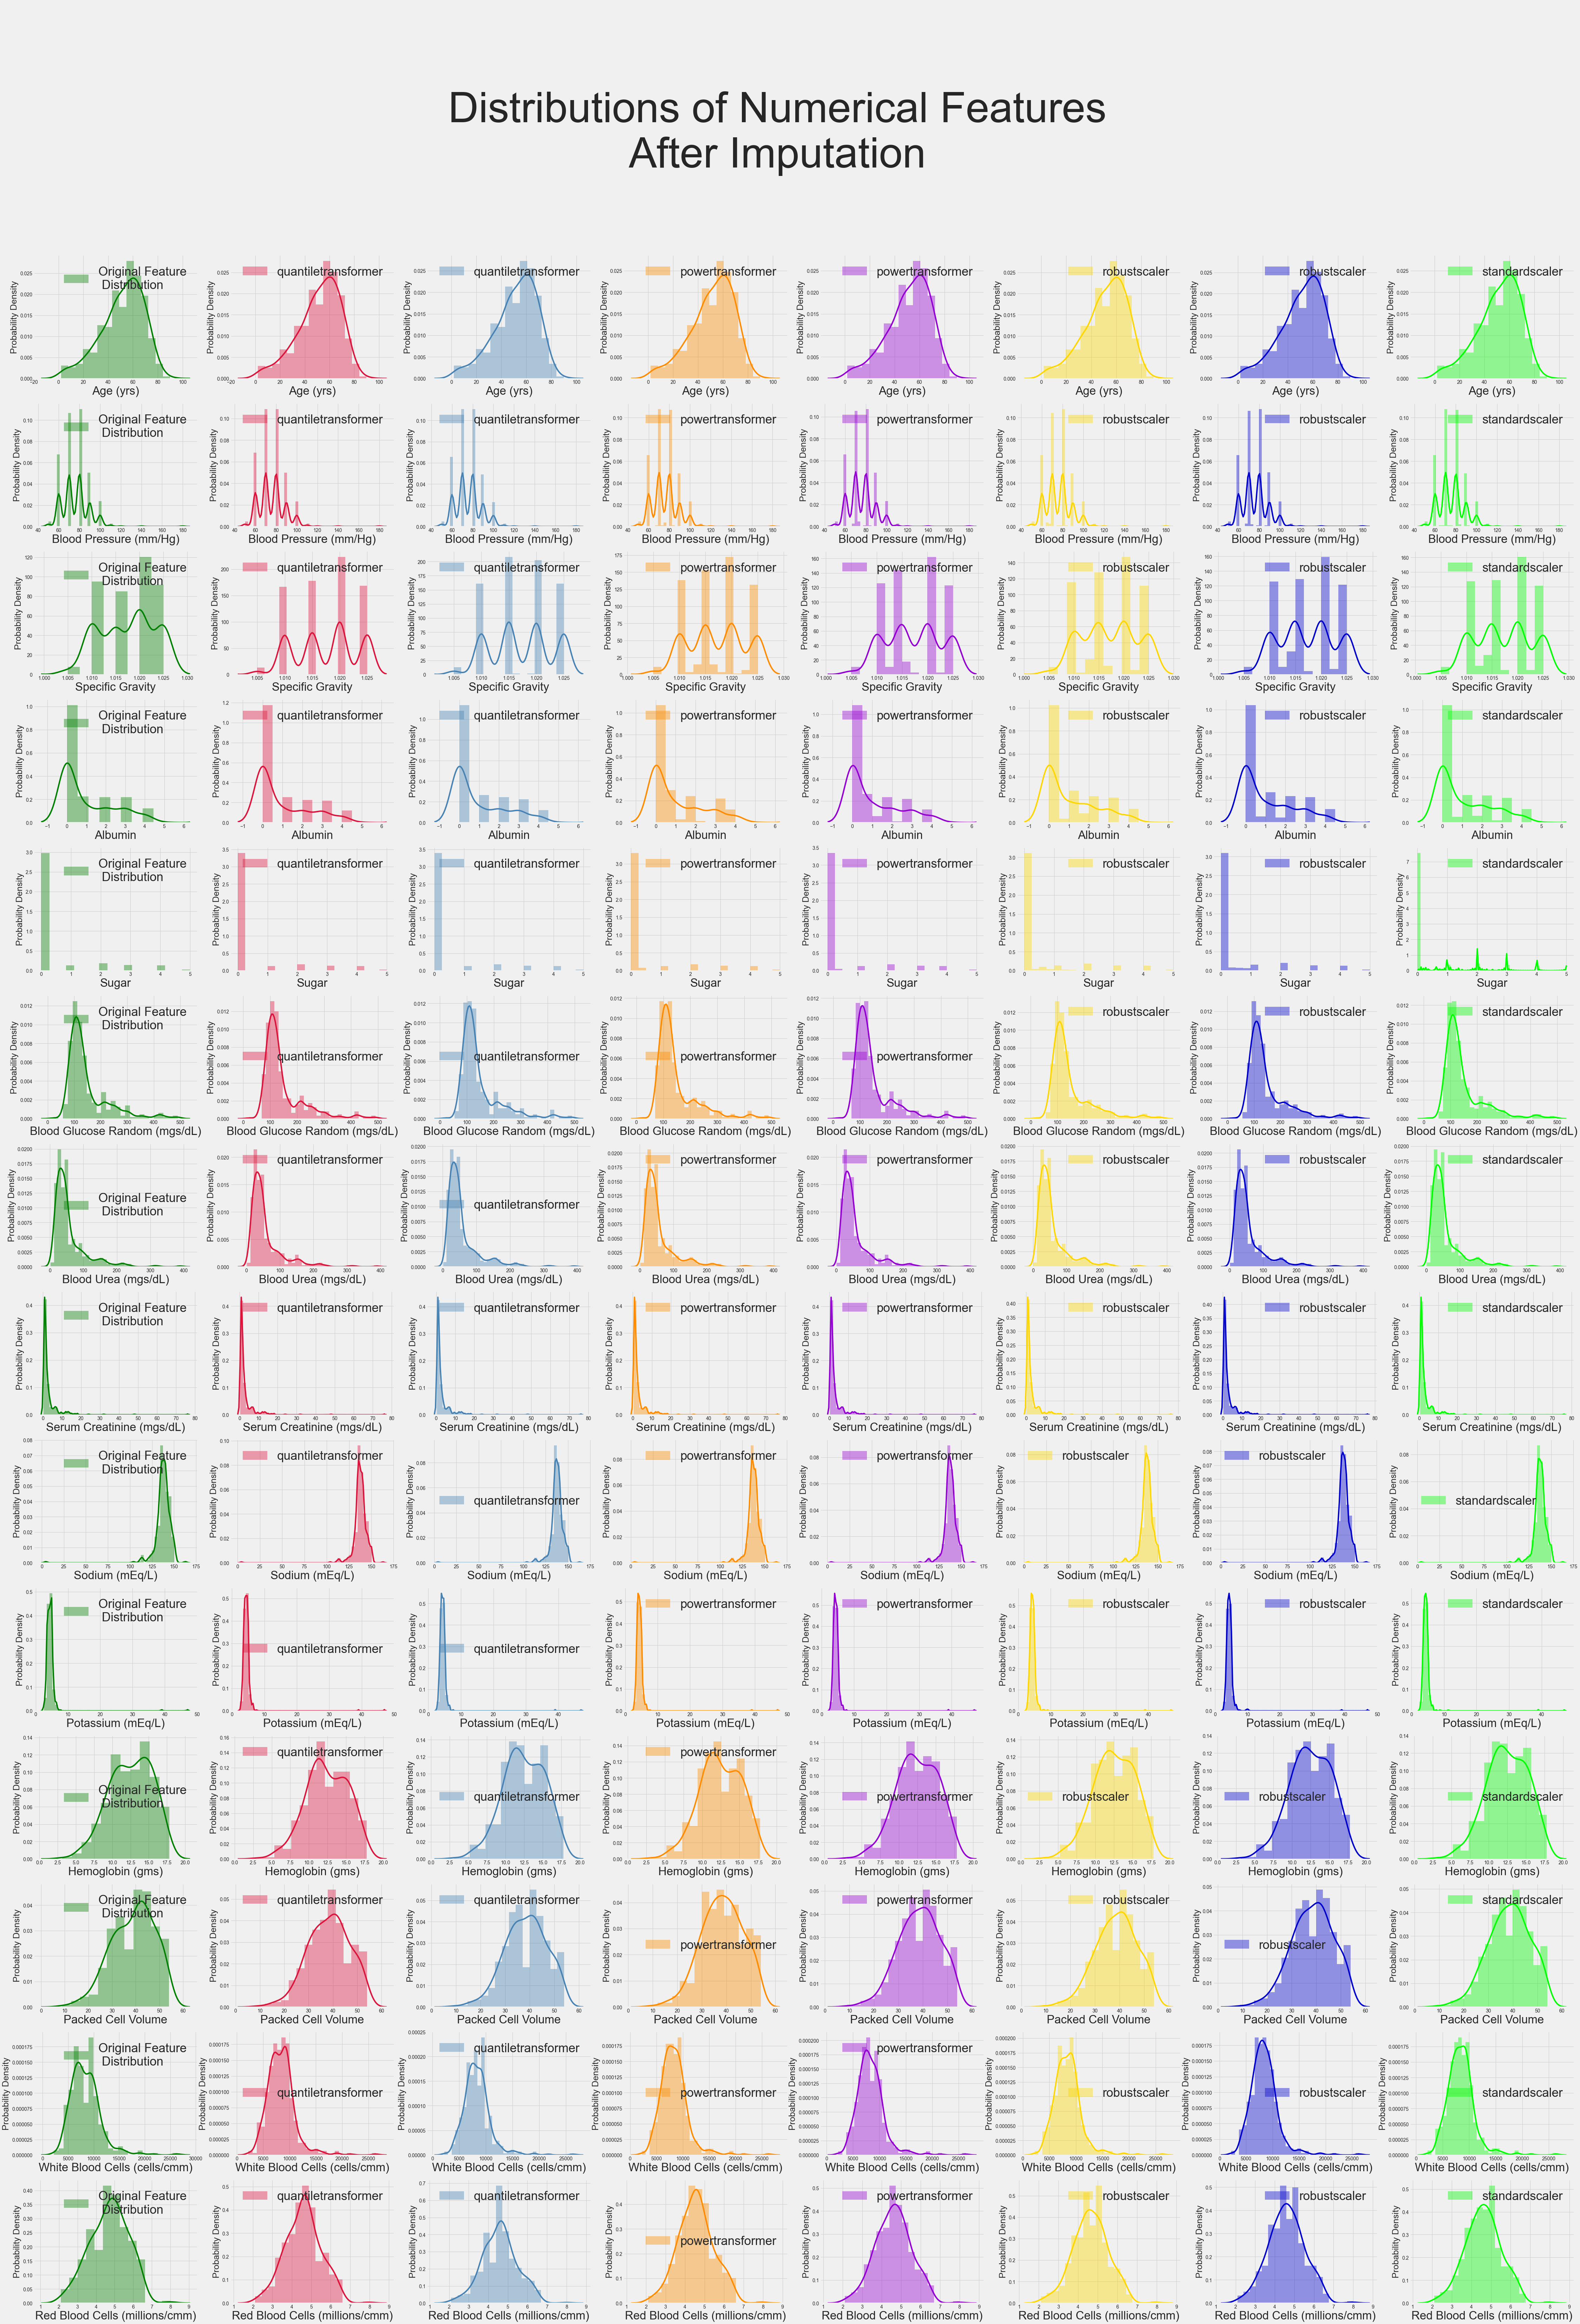

In [47]:
n_rows, n_cols = (14,8)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(70, 100))
figure.suptitle('\n\nDistributions of Numerical Features\nAfter Imputation', fontsize=120)
for i in range(14):
    fig = sns.distplot(onehotdata.iloc[:,i], color="g", label='Original Feature\n Distribution', norm_hist=True,
    
    ax=axes[i,0], kde_kws={"lw":4})
    
    fig=fig.legend(loc='best', fontsize=35)
    
    axes[i,0].set_xlabel(axes[i,0].get_xlabel(),fontsize=33)
    
    axes[i,0].set_ylabel("Probability Density",fontsize=25)

for j in range(1,8):
    for i in range(14):
        label=Pipes[j-1].steps[0][0]
        
        fig = sns.distplot(impdf[j].iloc[:,i], color=colors[j-1], label=label, norm_hist=True,

        ax=axes[i,j], kde_kws={"lw":4})
        
        fig=fig.legend(loc='best', fontsize=35)
    
        axes[i,j].set_ylabel("Probability Density",fontsize=25)
        
        axes[i,j].set_xlabel(axes[i,j].get_xlabel(),fontsize=33)

plt.show()

In [48]:
impdf[6].iloc[:,15].unique()

array([1.        , 0.        , 0.63160166, 0.88607326, 0.61387208,
       0.75862137, 0.70806966, 0.86137172, 0.63119148, 0.89543788,
       0.74179684, 0.77161848, 0.61793009, 0.82398101, 0.75406756,
       0.36706328, 0.5835219 , 0.74235729, 0.87901676, 0.64341621,
       0.36860117, 0.78812957, 0.45736785, 0.74810413, 0.73289946,
       0.88144675, 0.75573017, 0.51257409, 0.89459771, 0.2498657 ,
       0.89557894, 0.7636394 , 0.75378168, 0.89316823, 0.76532431,
       0.83814399, 0.5902046 , 0.88189939, 0.6411361 , 0.74195041,
       0.82964032, 0.86885068, 0.63890626, 0.48569735, 0.88566203,
       0.77744959, 0.63198161, 0.73726093, 0.61095653, 0.62328647,
       0.67830806, 0.71205989, 0.78204737, 0.40201877, 0.48129177])

All we have to do is use 0.5 as a threshhold. Everything above becomes 1, everything under becomes 0.

In [49]:
test=impdf.copy()
for j in range(1,8):
    dat=test[j]
    for i in range(14,25):
        col=dat.iloc[:,i]
        for k in range(400):
            if col[k]>=0.5:
                col[k]=1
            else:
                col[k]=0

In [50]:
test[6].iloc[:,16].unique()

array([0., 1.])

In [51]:
impdf=test

In [52]:
fwmmv=list(numerical_feats.copy())
the_other_ones=['Age (yrs)','Blood Pressure (mm/Hg)','Serum Creatinine (mgs/dL)','Blood Urea (mgs/dL)']
for f in range(len(the_other_ones)):
    if the_other_ones[f] in fwmmv:
        fwmmv.remove(the_other_ones[f])
fwmmv.extend(('Red Blood Cells: normal','Pus Cells: normal'))

In [53]:
fwmmv #features with many missing values

['Specific Gravity',
 'Albumin',
 'Sugar',
 'Blood Glucose Random (mgs/dL)',
 'Sodium (mEq/L)',
 'Potassium (mEq/L)',
 'Hemoglobin (gms)',
 'Packed Cell Volume',
 'White Blood Cells (cells/cmm)',
 'Red Blood Cells (millions/cmm)',
 'Red Blood Cells: normal',
 'Pus Cells: normal']

In [54]:
indices=[1,6,7]

In [55]:
onehotdata=impdf[1].copy()

In [56]:
onehotdata.dropna().shape

(400, 25)

We have no more missing values

# Clustering & Prediction

### Prediction Using K-Means Clustering

In [57]:
X=onehotdata.drop("Chronic Kidney Disease: yes",axis=1,inplace=False)
Y=onehotdata["Chronic Kidney Disease: yes"]

In [58]:
full_scaled_data=SS.fit_transform(onehotdata)
scaled_data=SS.fit_transform(X)

In [59]:
from sklearn.cluster import KMeans

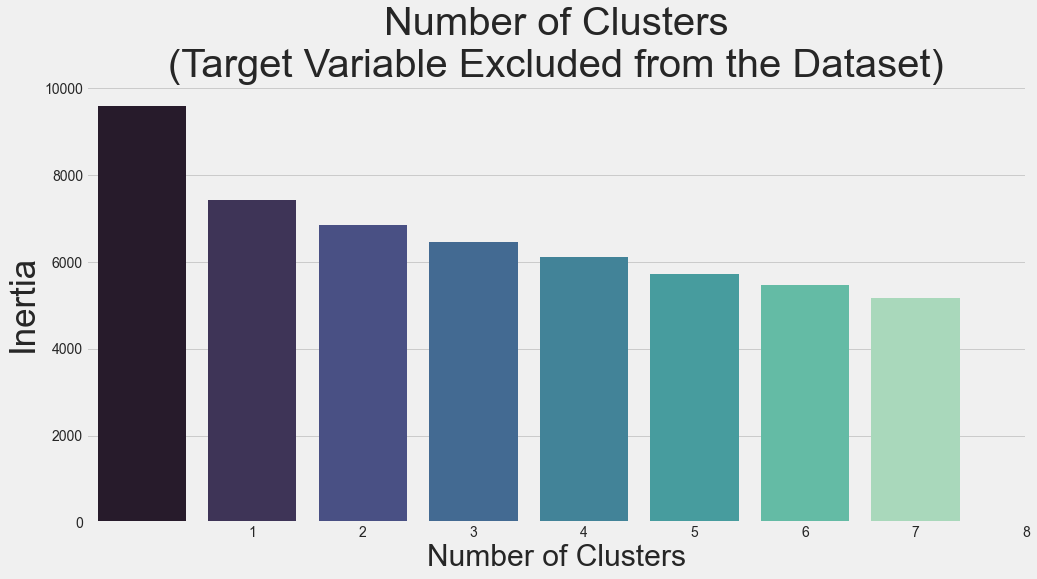

In [61]:
inertias = []

ks=list(range(1,9))

for k in ks:
    model=KMeans(n_clusters=k)
    
    model.fit(scaled_data)
    
    inertias.append(model.inertia_)

plt.figure(figsize=(15,7.5))
sns.barplot(ks, inertias, palette='mako')
plt.xlabel('Number of Clusters',fontsize=30)
plt.ylabel('Inertia',fontsize=35)
plt.xticks(ks)
plt.title("Number of Clusters\n(Target Variable Excluded from the Dataset)",fontsize=40)
plt.show()

##### Notes:
    There's always a cluster where the majority don't have the disease.  
    Other clusters only contain ill people.  
    With 5 and 6 clusters, one can notice a cluster containing only two ill people.  
    I think that might be a sign of overfitting.

### K-means, K-median and K-mode algorithms with Dimensionality Reduction

In [63]:
from sklearn.manifold import TSNE

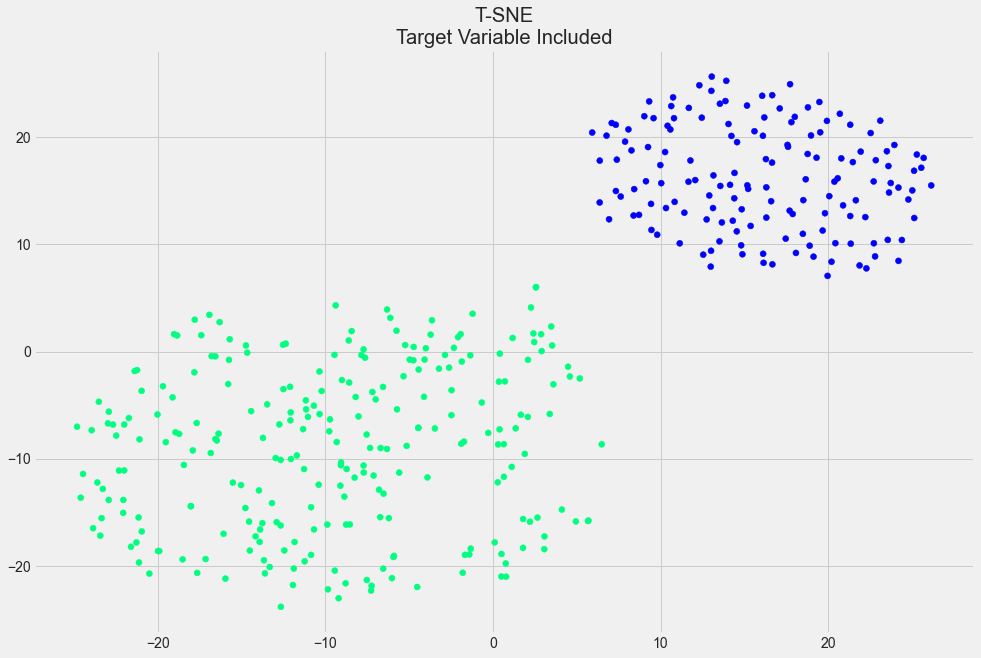

In [64]:
tsne_model = TSNE()
tsne_data= tsne_model.fit_transform(full_scaled_data)
xs=tsne_data[:,0]
ys=tsne_data[:,1]
plt.figure(figsize=(15,10))
plt.scatter(xs,ys,c=pd.get_dummies(onehotdata['Chronic Kidney Disease: yes'],drop_first=True).values,cmap="winter")
plt.title("T-SNE\nTarget Variable Included")
plt.show()

Perfectly separated.  

### k-Means: Advantages and Disadvantages 

##### Advantages	
-Easy to implement	
-With a large	number	of	variables,	K-Means	may	be	computaHonally	faster	than	
hierarchical	clustering	(if	K	is	small).	
-k-Means	may	produce	Hghter	clusters	than	hierarchical	clustering	
-An	instance	can	change	cluster	(move	to	another	cluster)	when	the	centroids	are	recomputed.		
    
    
##### Disavantages	
-Difficult	to	predict	the	number	of	clusters	(K-Value)	
-IniHal	seeds	have	a	strong	impact	on	the	final	results	
-The	order	of	the	data	has	an	impact	on	the	final	results	
-SensiHve	to	scale:	rescaling	your	datasets	(normalizaHon	or	standardizaHon)	will	
completely	change	results.	While	this	itself	is	not	bad,	not	realizing	that	you	have	to	
spend	extra	a4en(on	to	scaling	your	data	might	be	bad.

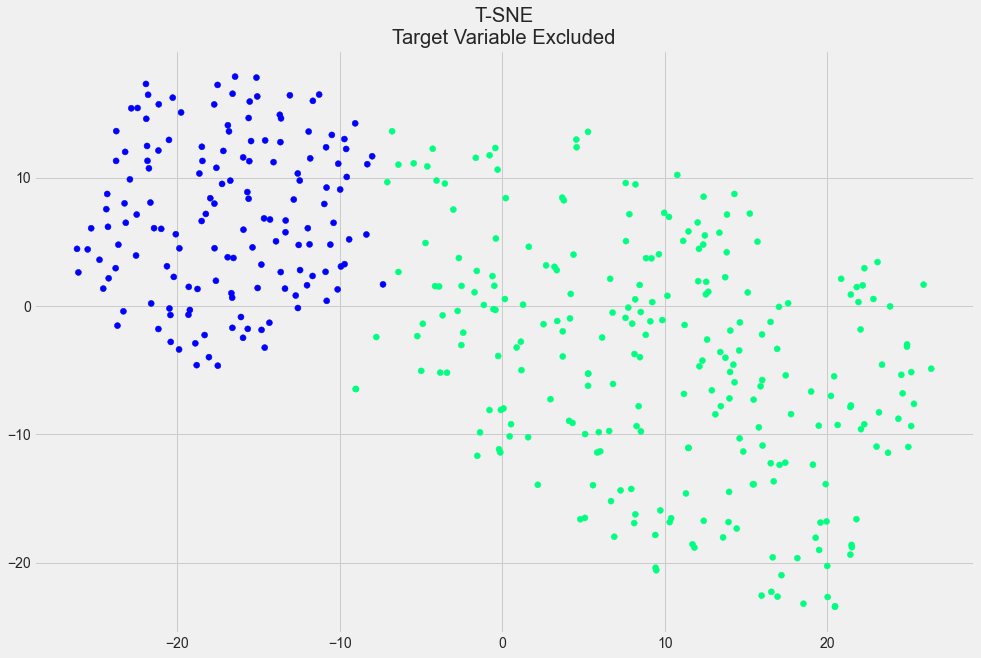

In [65]:
tsne_data= tsne_model.fit_transform(scaled_data)
xs=tsne_data[:,0]
ys=tsne_data[:,1]
plt.figure(figsize=(15,10))
plt.scatter(xs,ys,c=pd.get_dummies(Y,drop_first=True).values,cmap="winter")
plt.title("T-SNE\nTarget Variable Excluded")
plt.show()

Categories are quite well-separated here, but not as much as when the target variable was included.

Anyhow, let's take a look at variation for each PCA component.

In [66]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_data)

PCA()

In [67]:
pca_features=list(range(1,25))

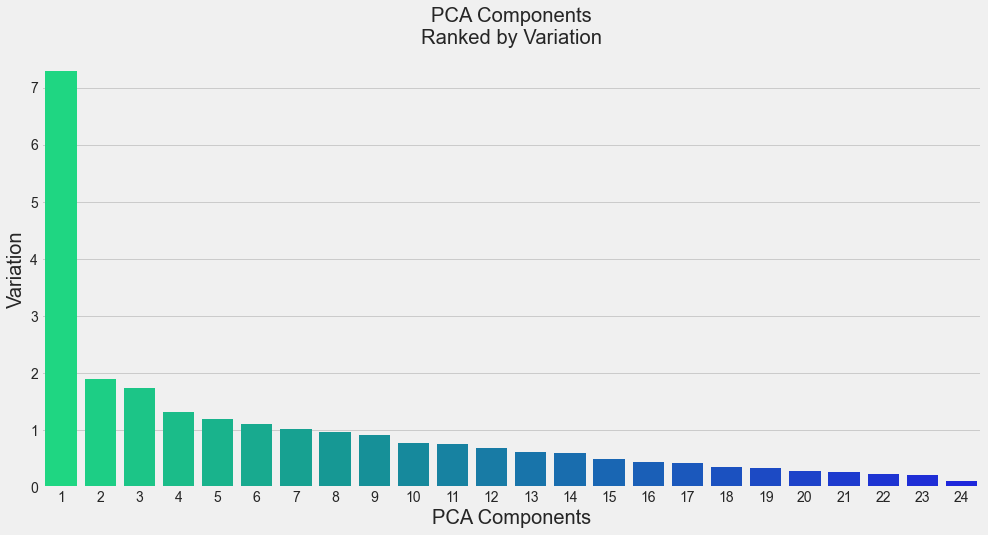

In [68]:
ax=plt.figure(figsize=(15,7.5))
sns.barplot(pca_features, pca.explained_variance_,palette="winter_r")
plt.ylabel('Variation',fontsize=20)
plt.xlabel('PCA Components',fontsize=20)
plt.title("PCA Components\nRanked by Variation")
plt.show()

How about two PCA components?

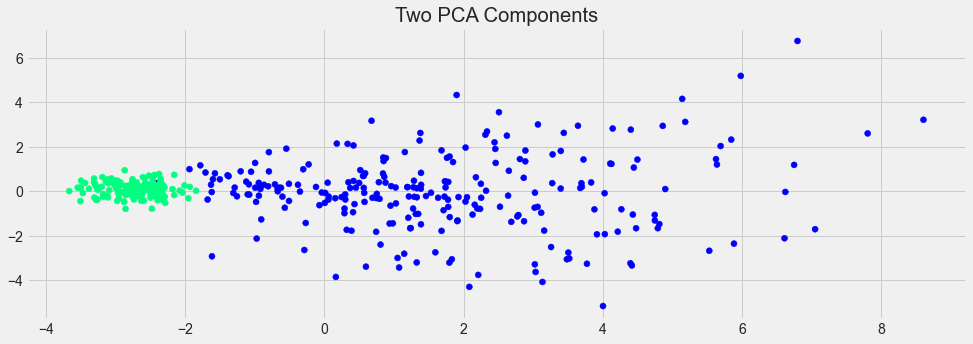

In [69]:
pca2=PCA(n_components=2)
pca2_data=pca2.fit_transform(scaled_data)
plt.figure(figsize=(15,5))
plt.scatter(pca2_data[:,0],pca2_data[:,1],c=onehotdata["Chronic Kidney Disease: yes"],cmap="winter_r")
plt.title('Two PCA Components')
plt.show()

Looks decent.  
We can zoom in on that mixed area:

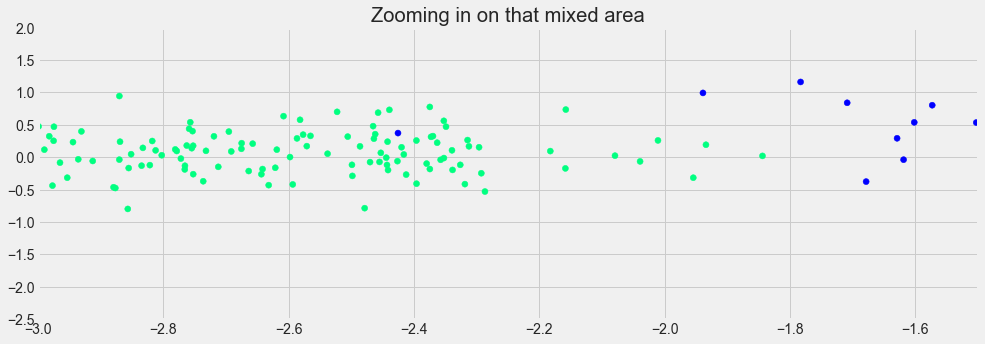

In [70]:
plt.figure(figsize=(15,5))
plt.scatter(pca2_data[:,0],pca2_data[:,1],c=onehotdata["Chronic Kidney Disease: yes"],cmap="winter_r")
plt.xlim(right=-1.5,left=-3)
plt.ylim(bottom=-2.5,top=2)
plt.title("Zooming in on that mixed area")
plt.show()

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, Y, test_size=0.4, random_state=12)

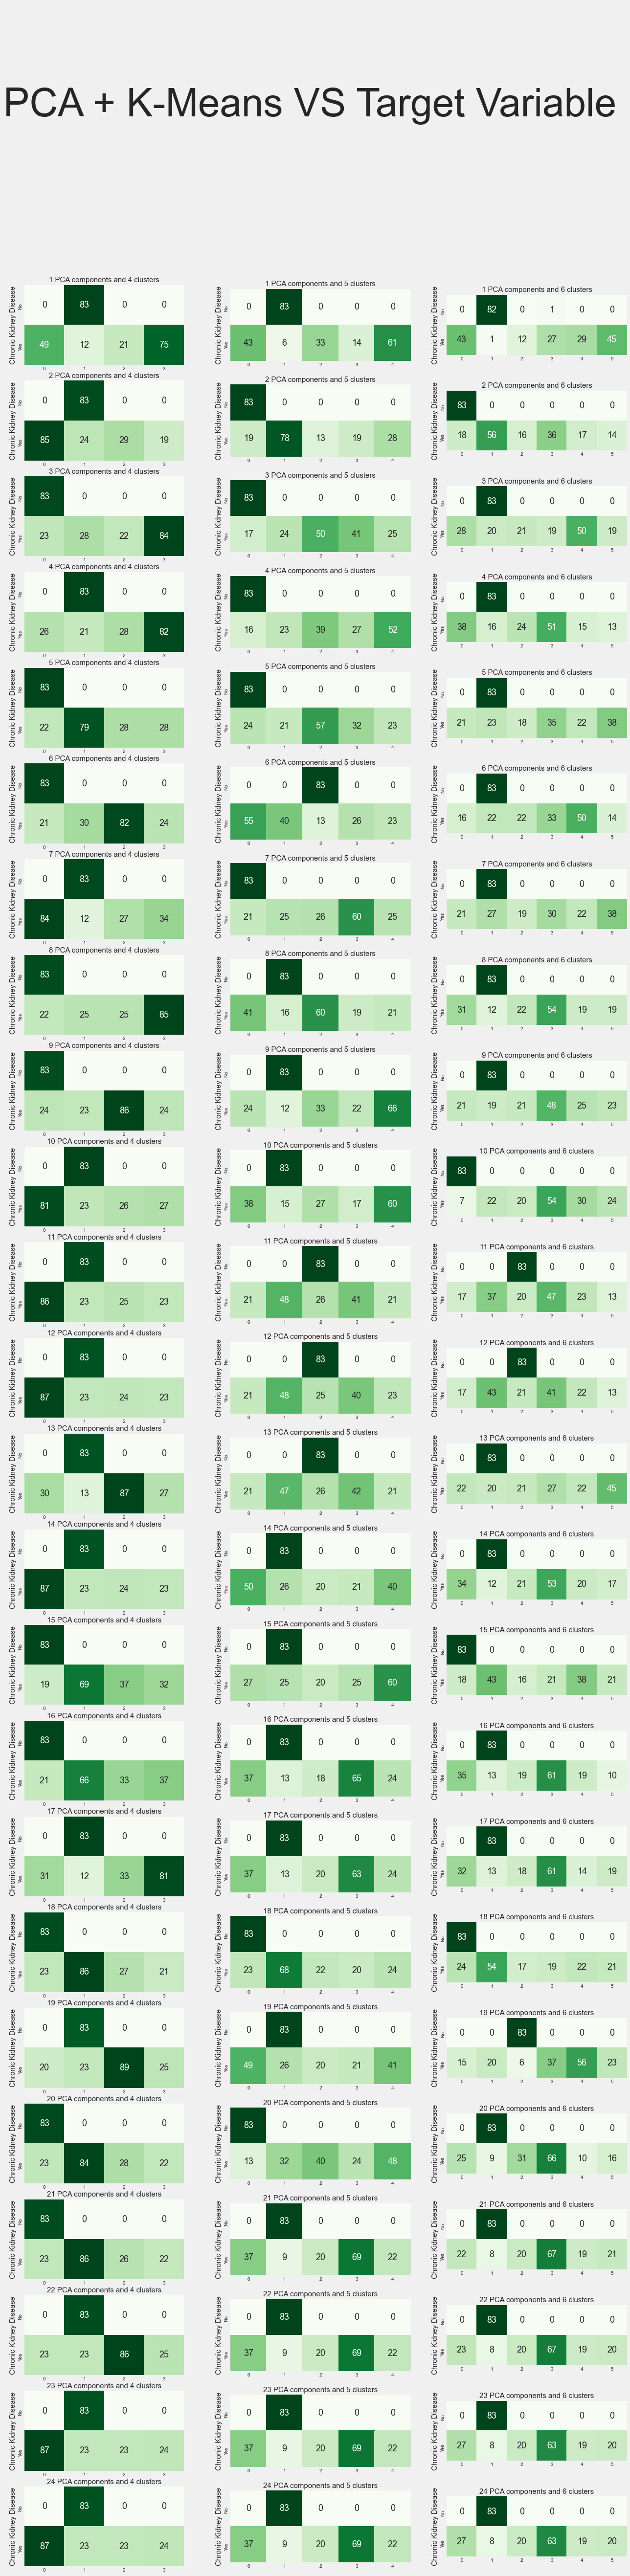

In [73]:
n_rows, n_cols = (24,3)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 80))

figure.suptitle('\n\nPCA + K-Means VS Target Variable\n', fontsize=80)

for index in range(72):
    
    i,j = (index // n_cols), (index % n_cols)
    
    pca = PCA(n_components=i+1)
    
    pca_data=pca.fit_transform(X_train)
    
    model=KMeans(n_clusters=j+4, random_state=5) #random_state is arbitrary,
                                                    #I just fixed it to make sure I always get the same results
    
    model.fit(pca_data)
    
    cluster_labels=model.predict(pca_data)
    
    sns.heatmap(pd.crosstab(Y_train,cluster_labels),
                ax=axes[i,j],
                cmap='Greens',
                square='True',
                cbar=False,
                annot=True,
                annot_kws={'fontsize':18},
                fmt='d')
    
    axes[i,j].set_title("{} PCA components and {} clusters".format(i+1,j+4),fontsize=15)
    
    axes[i,j].set_ylabel("Chronic Kidney Disease",fontsize=15)
    
    axes[i,j].set_xlabel(None)
    
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(),fontsize=10)
    
    axes[i,j].set_yticklabels(["No","Yes"],fontsize=10)

### k-Mode: Advantages and Disadvantages 

##### Advantages	
-Relatively simple to implement.                                
-Scales to large data sets.                                
-Guarantees convergence.                                
-Can warm-start the positions of centroids.                                
-Easily adapts to new examples.                                
-Generalizes to clusters of different shapes and sizes, such as elliptical clusters.	                            
    
    
##### Disavantages	
-Choosing k manually.                                
-Being dependent on initial values.                                
-Clustering data of varying sizes and density.                                
-Clustering outliers.                                
-Scaling with number of dimensions.                                                             

##### Notes:

Our best result is with 1 PCA component and 6 clusters.  
***Training Accuracy = 238/240 = 99%***  
Adding components beyond the first one was, for the most part, useless.  
As the number of cluster increases, the mixed cluster becomes cleaner.  
We could keep increasing the number of clusters to further clean that mixed cluster, but we might get an overfit model.

To measure accuracy, we should train the model on a set of training data then test it on different data.  
To make predictions with a clustering algorithm, we can use one of the two following methods:  

1-We train the model, associate each cluster with the appropriate category (which is the majority for mixed clusters), then assign each to-be-predicted sample to the nearest cluster centre (centroid).
Again, in mixed clusters, most represented values will be considered correct.  

2-We train the model, associate each cluster with the appropriate category, then we determine a centroid for each category.  
This is done by calculating the weighted average of centroids for each category, the weights being cluster sizes.  
Then we assign each to-be-predicted sample to the nearest category centroid.  
I think this is very likely to reduce variance, but perhaps increase bias.  

Calculate accuracy for the testing data now using the first method.

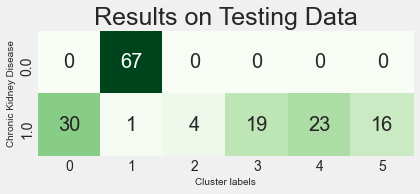

In [74]:
pca = PCA(n_components=1)
    
pca_training_data=pca.fit_transform(X_train)

model=KMeans(n_clusters=6, random_state=5)
    
model.fit(pca_training_data)

pca_testing_data=pca.transform(X_test)

cluster_labels=model.predict(pca_testing_data)

sns.heatmap(pd.crosstab(Y_test,cluster_labels),
                cmap='Greens',
                square='True',
                cbar=False,
                annot=True,
                annot_kws={'fontsize':20},
                fmt='d')

plt.title("Results on Testing Data",fontsize=25)
plt.ylabel("Chronic Kidney Disease",fontsize=10)
plt.xlabel("Cluster labels",fontsize=10)
plt.show()

Nice! Only one sample out of 160 is misclassified.
****Testing Accuracy = 159/160 = 99% ****